# mencari kata kunci pada berita

## preprocessing text

### import library

In [1]:
import pandas as pd
import nltk
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations


### load data

In [2]:
df = pd.read_csv('berita_kompas.csv')
df.head()

,judul,isi,tanggal,kategori
0,"Bilang ""Rakyat Jelata"" Saat Tanggapi Miftah Hi...","JAKARTA, KOMPAS.com - Juru Bicara (Jubir) Kant...","Kompas.com - 05/12/2024, 19:34 WIB",Nasional
1,Buron Interpol Asal China Raup Rp 284 dari Bis...,"JAKARTA, KOMPAS.com - Buron Interpol asal Chin...","Kompas.com - 05/12/2024, 19:34 WIB",Nasional
2,"Kebakaran Kafe di Kemang, Pegawai Menyelamatka...","JAKARTA, KOMPAS.com - Sebuah kafe di Kemang, J...","Kompas.com - 05/12/2024, 19:29 WIB",Megapolitan
3,Jaksa Tuntut Helena Lim Bayar Uang Pengganti R...,"JAKARTA, KOMPAS.com - Pemilik perusahaan money...","Kompas.com - 05/12/2024, 19:27 WIB",Nasional
4,Real Count Pilkada Tangsel: Benyamin-Pilar Men...,"TANGERANG SELATAN, KOMPAS.com - Calon wali kot...","Kompas.com - 05/12/2024, 19:22 WIB",Megapolitan


### preprocessing data

In [3]:
def preptext(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
    text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
    text = re.sub(r"[^a-zA-Z :\.]", "", text) # Menghapus tanda baca
    text = re.sub(r'\d', ' ', text)#menghapus angka
    text = re.sub(r'#([^\s]+)', ' ', text)#menghapus hashtag
    words = word_tokenize(text.lower())

    sw = set(stopwords.words("indonesian"))
    words = [word for word in words if word.lower() not in sw]
    return ' '.join(words)

df['isi_baru'] = df['isi'].apply(preptext)
print(df['isi_baru'].head())

0    jakarta kompas.com juru bicara jubir kantor ko...
1    jakarta kompas.com buron interpol chin yan zhe...
2    jakarta kompas.com kafe kemang jakarta selatan...
3    jakarta kompas.com pemilik perusahaan money ch...
4    tangerang selatan kompas.com calon wali kota w...
Name: isi_baru, dtype: object


### memisahkan kalimat

In [4]:
no = int(input('Masukkan berita ke berapa yang ingin di cari kata kuncinya : '))
kalimat = nltk.sent_tokenize(df['isi_baru'][no])
kalimat = [sentence.replace('.','') for sentence in kalimat]
kata = nltk.word_tokenize(df['isi_baru'][no])
kata = list(set(key for key in kata if key != '.'))

kalimat

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [5]:
kata

['jakarta',
 'api',
 'dasarnya',
 'lampu',
 'toko',
 'sekitaran',
 'ii',
 'menduga',
 'narkoba',
 'lokasi',
 'gudang',
 'menerobosnya',
 'berizin',
 'menyelamatkan',
 'daycare',
 ':',
 'baca',
 'bnn',
 'polda',
 'kamis',
 'pembakaran',
 'memadamkan',
 'pegawai',
 'petugas',
 'aniaya',
 'kebakaran',
 'pemadam',
 'air',
 'tandatanda',
 'membumbung',
 'menerobos',
 'mati',
 'lantai',
 'kaca',
 'pengasuhnya',
 'peredaran',
 'ditelepon',
 'menyebut',
 'jatim',
 'kepala',
 'akibat',
 'memecahkan',
 'hasil',
 'berjibaku',
 'berselang',
 'pantauan',
 'antarpulau',
 'cerobong',
 'bangunan',
 'bayi',
 'kiddy',
 'kepulan',
 'tangkap',
 'anggota',
 'ditemui',
 'asap',
 'selatan',
 'depok',
 'salah',
 'kemang',
 'kafe',
 'berkobar',
 'terlibat',
 'kompas.com',
 'terbakar',
 'basement',
 'wib',
 'space',
 'sore',
 'tebal',
 'menyemprotkan',
 'tanpak']

## modeling

### membuat matrix

In [6]:
def vektor_kata(data):
    vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)
    
    for i, sent in enumerate(data):
        # Tokenisasi kalimat menjadi kata-kata
        kata_kalimat = word_tokenize(sent)
        
        # Hitung frekuensi kata menggunakan Counter
        freq_kata = Counter(kata_kalimat)
        
        # Update DataFrame dengan frekuensi kata yang ditemukan dalam kata
        for word, count in freq_kata.items():
            if word in kata:
                vektor_kata.at[i, word] = count

    return vektor_kata

vektorisasi_kata = vektor_kata(kalimat)
print(vektorisasi_kata)

    jakarta  api  dasarnya  lampu  toko  sekitaran  ii  menduga  narkoba  \
0         2    0         0      0     0          0   0        0        0   
1         0    0         0      0     0          0   0        0        0   
2         0    0         0      0     0          0   0        0        0   
3         0    1         0      0     0          0   0        0        0   
4         0    0         0      0     0          0   0        0        0   
5         0    0         1      0     0          0   0        0        0   
6         0    0         0      0     0          0   0        0        0   
7         0    0         0      0     1          0   1        0        1   
8         0    0         0      0     0          0   0        0        0   
9         0    0         0      0     0          0   0        0        0   
10        0    0         0      1     0          0   1        0        0   
11        0    0         0      0     0          1   1        0        0   
12        0 

### hasil kata kunci

In [7]:
kunci = vektorisasi_kata.sum().sort_values(ascending=False)[:4]
print(", ".join(kunci.index))

kafe, kebakaran, asap, ii


### co-occurrence matrix

In [8]:
def cooc_matrix(data):
    vektor_kata = pd.DataFrame(0, index=kata, columns=kata)
    
    for sent in data:
        kata_kalimat = word_tokenize(sent)
        
        for word1, word2 in combinations(kata_kalimat, 2):#mencari kata yg sering muncul menggunakan combination
            if word1 in kata and word2 in kata:
                # Tambahkan ke matrix untuk kedua arah (word1, word2) dan (word2, word1)
                vektor_kata.at[word1, word2] += 1
                vektor_kata.at[word2, word1] += 1

    return vektor_kata

cooccurrence_matrix = cooc_matrix(kalimat)
print(cooccurrence_matrix)
kunci2 = cooccurrence_matrix.sum().sort_values(ascending=False)[:4]
kunci2

               jakarta  api  dasarnya  lampu  toko  sekitaran  ii  menduga  \
jakarta              2    0         0      0     0          0   0        0   
api                  0    0         0      0     0          0   1        0   
dasarnya             0    0         0      0     0          0   0        0   
lampu                0    0         0      0     0          0   1        0   
toko                 0    0         0      0     0          0   1        0   
...                ...  ...       ...    ...   ...        ...  ..      ...   
space                0    1         0      0     0          0   1        0   
sore                 2    0         0      0     0          0   0        0   
tebal                0    0         0      0     0          1   1        0   
menyemprotkan        0    0         0      0     0          0   0        0   
tanpak               0    0         0      0     0          0   0        0   

               narkoba  lokasi  ...  terlibat  kompas.com  terb

kafe         78
kebakaran    60
ii           52
menyebut     42
dtype: int64

### cosine similaritas

Rumus Cosine Similarity:
cosine similarity
=
𝐴
⋅
𝐵
/
∥
𝐴
∥
∥
𝐵
∥
cosine similarity= 
∥A∥∥B∥
A⋅B
​
 


In [9]:
cosine = cosine_similarity(cooccurrence_matrix)
cosine

array([[1.        , 0.20965697, 0.28571429, ..., 0.15430335, 0.15430335,
        0.21821789],
       [0.20965697, 1.        , 0.20965697, ..., 0.39629696, 0.50952467,
        0.        ],
       [0.28571429, 0.20965697, 1.        , ..., 0.15430335, 0.15430335,
        0.65465367],
       ...,
       [0.15430335, 0.39629696, 0.15430335, ..., 1.        , 0.33333333,
        0.        ],
       [0.15430335, 0.50952467, 0.15430335, ..., 0.33333333, 1.        ,
        0.        ],
       [0.21821789, 0.        , 0.65465367, ..., 0.        , 0.        ,
        1.        ]])

### buat dalam bentuk graph

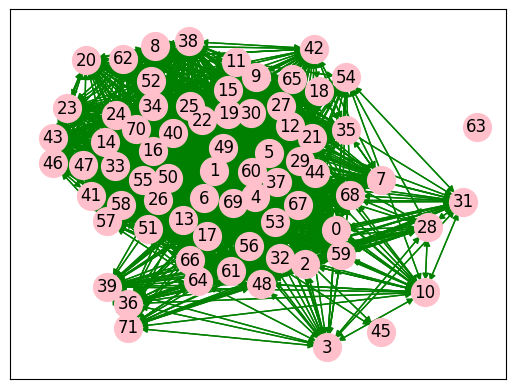

In [10]:
G = nx.DiGraph()
for i in range(len(cosine)):
    G.add_node(i)

for i in range(len(cosine)):
    for j in range(len(cosine)):
        similarity = cosine[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx_nodes(G, pos, node_size=400, node_color='pink')
nx.draw_networkx_edges(G, pos, edge_color='green', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

### pemeringkatan node


In [11]:
rank_word = nx.pagerank(G)

sorted_pagerank= sorted(rank_word.items(), key=lambda x: x[1], reverse=True)
print("Ranked page berita ke-",no,":")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Ranked page berita ke- 2 :
Node 60: 0.0192
Node 37: 0.0186
Node 6: 0.0183
Node 5: 0.0181
Node 29: 0.0181
Node 69: 0.0181
Node 1: 0.0178
Node 55: 0.0178
Node 21: 0.0167
Node 25: 0.0167
Node 26: 0.0167
Node 15: 0.0162
Node 16: 0.0162
Node 12: 0.0160
Node 14: 0.0160
Node 24: 0.0160
Node 33: 0.0160
Node 34: 0.0160
Node 41: 0.0160
Node 44: 0.0160
Node 49: 0.0160
Node 50: 0.0160
Node 57: 0.0160
Node 67: 0.0160
Node 13: 0.0160
Node 27: 0.0160
Node 30: 0.0160
Node 40: 0.0160
Node 51: 0.0160
Node 70: 0.0160
Node 32: 0.0149
Node 64: 0.0149
Node 0: 0.0146
Node 2: 0.0146
Node 48: 0.0146
Node 22: 0.0145
Node 47: 0.0145
Node 56: 0.0142
Node 68: 0.0142
Node 9: 0.0138
Node 38: 0.0135
Node 46: 0.0135
Node 52: 0.0135
Node 53: 0.0135
Node 58: 0.0135
Node 62: 0.0135
Node 4: 0.0135
Node 8: 0.0135
Node 17: 0.0135
Node 18: 0.0135
Node 35: 0.0135
Node 66: 0.0133
Node 23: 0.0133
Node 43: 0.0133
Node 19: 0.0132
Node 59: 0.0132
Node 61: 0.0131
Node 11: 0.0130
Node 65: 0.0126
Node 7: 0.0112
Node 20: 0.0112
Node 4

### hasil kata kunci 

In [12]:
print("4 rank node teratas dari berita ke ",no ,":")
sentence = ""
for node, pagerank in sorted_pagerank[:4]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"kata: {top_sentence}")

4 rank node teratas dari berita ke  2 :
Node 60: Page Rank = 0.0192
kata: kafe
Node 37: Page Rank = 0.0186
kata: menyebut
Node 6: Page Rank = 0.0183
kata: ii
Node 5: Page Rank = 0.0181
kata: sekitaran
